In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from neuralart.trainer import Trainer

2021-08-31 02:23:12.737458: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-31 02:23:12.737482: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
image_folder_path = "../raw_data/wikiart/train_val_test_True_200/"

# image_folder_path = "../raw_data/wikiart/wikiart-movement-genre_True-class_8-merge_mov-1-n_200_max/"
# csv_filename_path = "../raw_data/wikiart/wikiart-movement-genre_True-class_8-merge_mov-1-n_200_max_split.csv"

batch_size = 32
img_height = 224
img_width = 224

In [4]:
trainer = Trainer(experiment_name="test_trainer")

In [5]:
trainer.create_dataset_from_directory(image_folder_path, batch_size, img_height, img_width)
# trainer.create_dataset_from_csv(csv_filename_path, image_folder_path, batch_size, img_height, img_width)

Found 1280 files belonging to 8 classes.
Found 160 files belonging to 8 classes.
Found 160 files belonging to 8 classes.


2021-08-31 02:23:14.658177: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-31 02:23:14.658262: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-08-31 02:23:14.658316: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-08-31 02:23:14.658369: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2021-08-31 02:23:14.658423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64

2021-08-31 02:24:07.772537: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


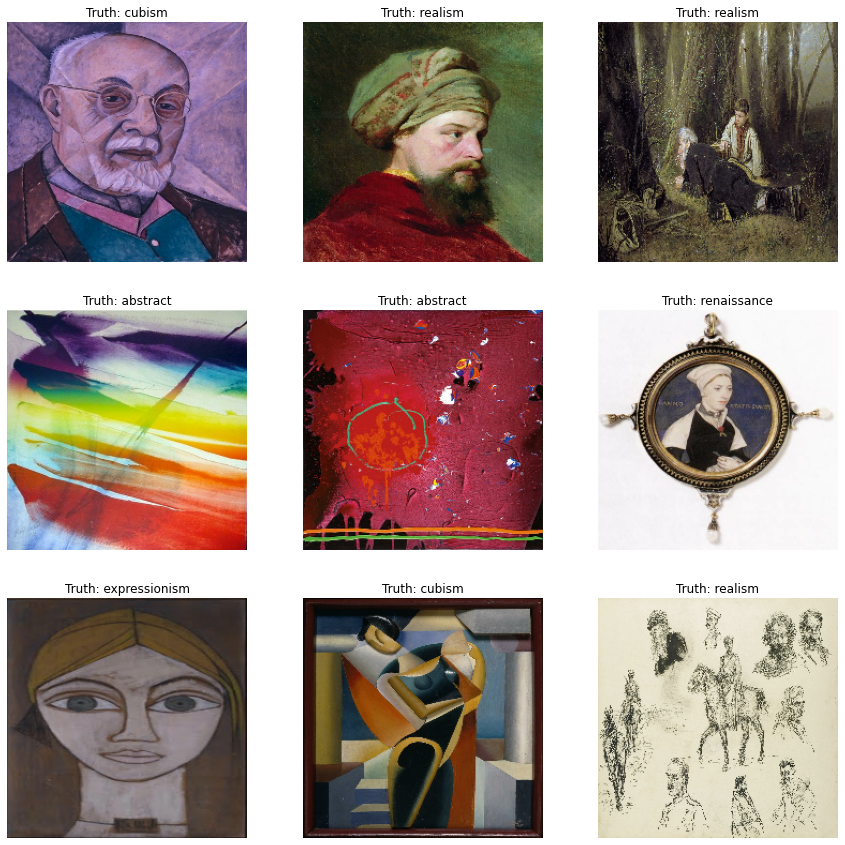

In [9]:
trainer.plot_val_batch()

In [7]:
trainer.build_model("VGG16")

In [10]:
trainer.run(epochs=5)

Epoch 1/5
40/40 [==============================] - 63s 1s/step - loss: 8.9602 - accuracy: 0.1281 - val_loss: 5.4425 - val_accuracy: 0.1875
Epoch 2/5
40/40 [==============================] - 60s 2s/step - loss: 7.3156 - accuracy: 0.1664 - val_loss: 4.7709 - val_accuracy: 0.2375
Epoch 3/5
40/40 [==============================] - 60s 2s/step - loss: 6.7897 - accuracy: 0.1797 - val_loss: 4.2828 - val_accuracy: 0.2750
Epoch 4/5
40/40 [==============================] - 60s 1s/step - loss: 6.2860 - accuracy: 0.1961 - val_loss: 3.9663 - val_accuracy: 0.3000
Epoch 5/5
40/40 [==============================] - 59s 1s/step - loss: 5.9075 - accuracy: 0.2117 - val_loss: 3.7198 - val_accuracy: 0.3125


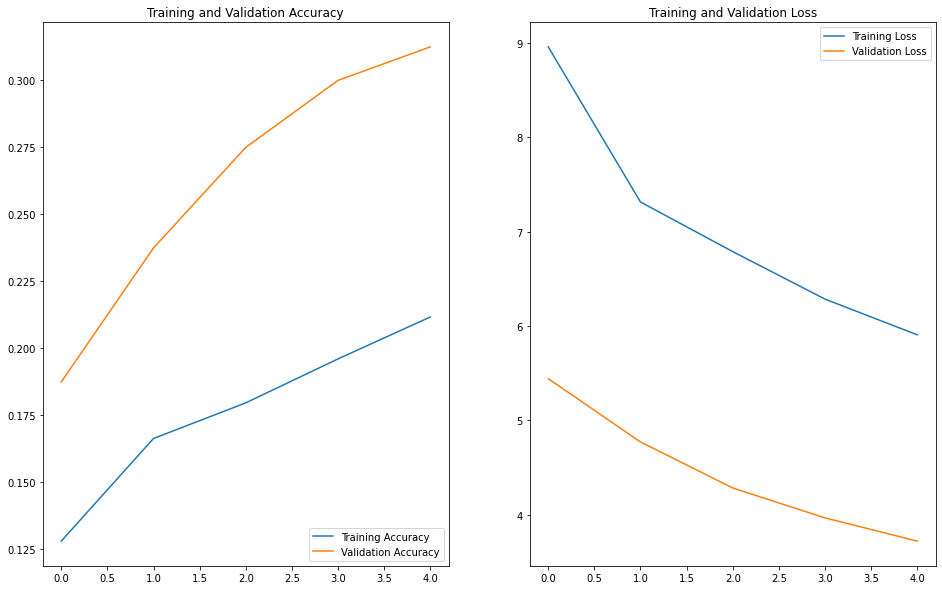

In [11]:
trainer.plot_history()

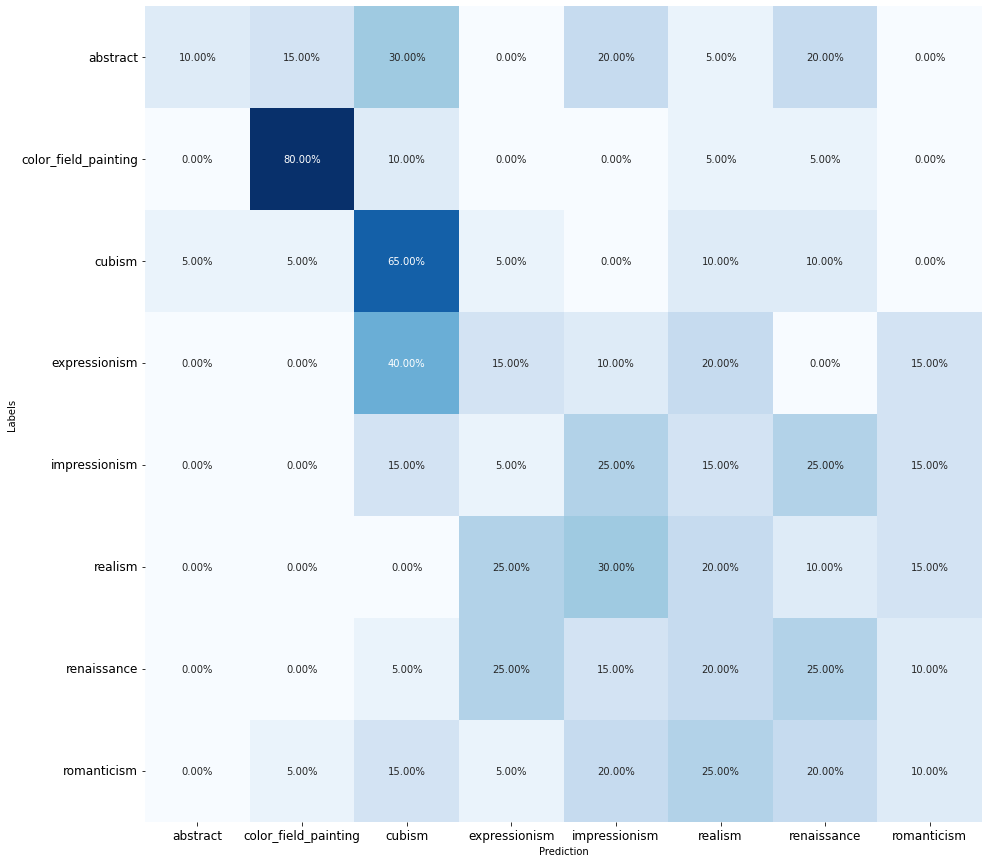

In [12]:
trainer.plot_confusion_matrix()

In [13]:
trainer.evaluate()

5/5 [==============================] - 7s 1s/step - loss: 3.9340 - accuracy: 0.3125


[3.9339680671691895, 0.3125]

In [14]:
trainer.save_model()

2021-08-31 02:46:16.171434: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../models/test_trainer/VGG16/20210831-024615-images_1600-unfreeze_2-batch_32/assets


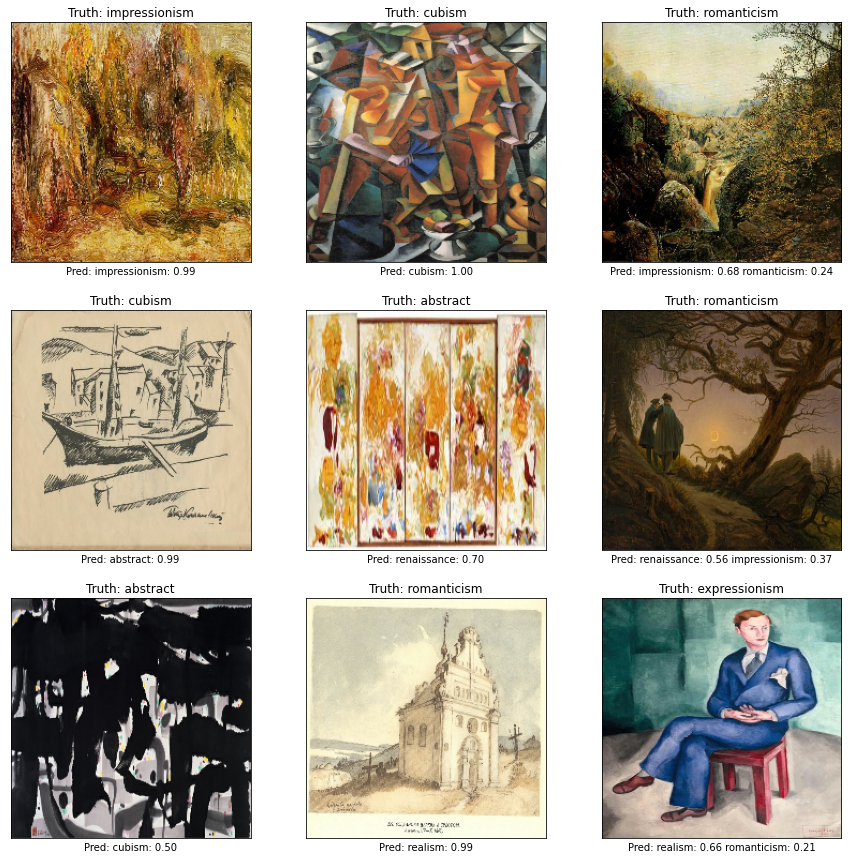

In [23]:
image_path = "../raw_data/wikiart/train_val_test_True_200/test/abstract/abstract-expressionism_conrad-marca-relli_untitled-1978-1.jpg"
trainer.plot_val_batch(make_prediction=True)